In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
!gdown 1d4VFxFxPqBpKoUuH51PQ8PYrFBmPCnH8

Downloading...
From: https://drive.google.com/uc?id=1d4VFxFxPqBpKoUuH51PQ8PYrFBmPCnH8
To: /Users/nikhilsanghi/Downloads/01_dsml-course-main-live/batches/01_MWF_Intro_to_ML/Supervised_Algorithms/09_Naive_Bayes_1/spam_clean.csv
100%|████████████████████████████████████████| 484k/484k [00:00<00:00, 4.25MB/s]


In [3]:
df = pd.read_csv('spam_clean.csv', encoding='latin-1')
df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


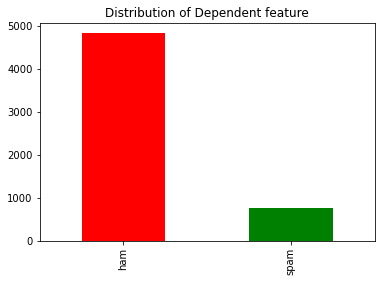

In [4]:
freq = pd.value_counts(df["type"], sort= True)
freq.plot(kind= 'bar', color= ["red", "green"])
plt.title('Distribution of Dependent feature')
plt.show()

In [5]:
# Libraries for text processing
import re, nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

def clean_tokenized_sentence(s):
    """Performs basic cleaning of a tokenized sentence"""
    cleaned_s = ""  # Create empty string to store processed sentence.
    words = nltk.word_tokenize(s)
    for word in words:
        # Convert to lowercase #
        c_word = word.lower()
        # Remove punctuations #
        c_word = re.sub(r'[^\w\s]', '', c_word)
        # Remove stopwords #
        if c_word != '' and c_word not in stopwords.words('english'):
            cleaned_s = cleaned_s + " " + c_word    # Append processed words to new list.
    return(cleaned_s.strip())

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nikhilsanghi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikhilsanghi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df["cleaned_message"] = df["message"].apply(clean_tokenized_sentence)
df.head(10)

,type,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling 3 week word back like fun ...
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aids patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,per request melle melle oru minnaminunginte nu...
8,spam,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,spam,Had your mobile 11 months or more? U R entitle...,mobile 11 months u r entitled update latest co...


In [7]:

ham = df[df['type'] == 'ham']
ham

,type,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aids patent
...,...,...,...
5565,ham,Huh y lei...,huh lei
5568,ham,Will Ì_ b going to esplanade fr home?,ì_ b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


In [8]:
ham = ham['cleaned_message']
ham

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
3                     u dun say early hor u c already say
4               nah nt think goes usf lives around though
6          even brother like speak treat like aids patent
                              ...                        
5565                                              huh lei
5568                         ì_ b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: cleaned_message, Length: 4825, dtype: object

In [9]:
counter_ham = Counter(ham).most_common(20)
counter_ham

[('sorry call later', 30),
 ('ok', 20),
 ('cant pick phone right pls send message', 12),
 ('', 7),
 ('okie', 7),
 ('ok lor', 5),
 ('sorry call later meeting', 4),
 ('wen ur lovable bcums angry wid u dnt take seriously coz angry childish n true way showing deep affection care n luv kettoda manda nice day da',
  4),
 ('opinion 1 2 jada 3 kusruthi 4 lovable 5 silent 6 spl character 7 matured 8 stylish 9 simple pls reply',
  4),
 ('late', 4),
 ('7 wonders world 7th 6th ur style 5th ur smile 4th ur personality 3rd ur nature 2nd ur sms 1st ur lovely friendship good morning dear',
  4),
 ('say slowly god love amp need clean heart bloodsend ten special people amp u c miracle tomorrow pls pls',
  4),
 ('per request melle melle oru minnaminunginte nurungu vettam set callertune callers press 9 copy friends callertune',
  3),
 ('calls messages missed calls', 3),
 ('place man', 3),
 ('entered cabin pa said happy bday boss felt special askd 4 lunch lunch invited apartment went',
  3),
 ('check rooms

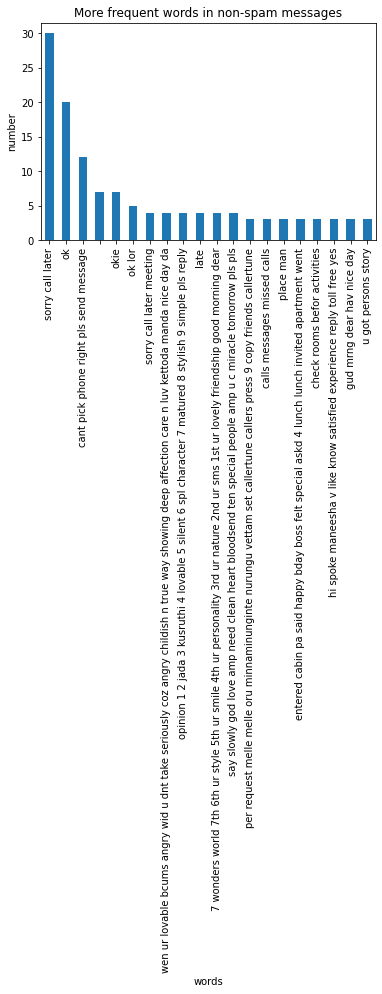

In [10]:
# load the results as a pandas dataframe in order to plot
df_ham = pd.DataFrame(counter_ham)

# Renaming the columns in this dataframe
df_ham = df_ham.rename(columns={0:"words in non-spam", 1:"count"})

# Plotting the data
df_ham.plot.bar(legend = False)
y_pos = np.arange(len(df_ham["words in non-spam"]))
plt.xticks(y_pos, df_ham["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

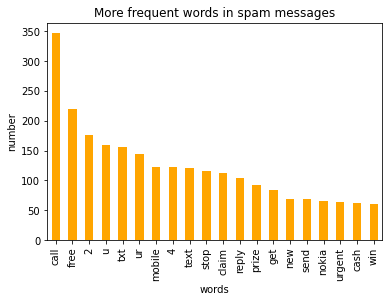

In [11]:
# Invoking the Counter() object on a list of words occuring in the "cleaned_message" column of spam texts, joined together
counter_spam = Counter(" ".join(df[df['type']=='spam']["cleaned_message"]).split()).most_common(20)

# load the results as a pandas dataframe in order to plot
df_spam = pd.DataFrame(counter_spam)

# Renaming the columns in this dataframe
df_spam = df_spam.rename(columns={0:"words in spam", 1:"count_"})

# Plotting the data
df_spam.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df_spam["words in spam"]))
plt.xticks(y_pos, df_spam["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [12]:
df["type"] = df["type"].map({'spam':1,'ham':0})

In [13]:
from sklearn.model_selection import train_test_split

df_X_train, df_X_test, y_train, y_test = train_test_split(df['cleaned_message'], df['type'], test_size=0.25, random_state=42)
print([np.shape(df_X_train), np.shape(df_X_test)])

[(4179,), (1393,)]
